In [1]:

import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import cross_val_score, KFold, train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [2]:
ds = pd.read_csv(r'3. Credit Scoring_ETL.csv')

In [8]:
ds.isna().sum()

TARGET             0
DerogCnt           0
BanruptcyInd       0
CollectCnt         0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt03            0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSum              0
TLMaxSum           0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLBalHCPct         0
TLSatPct           0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLOpenPct          0
TLBadDerogCnt      0
TLDel60Cnt24       0
TLOpen24Pct        0
dtype: int64

In [9]:
ds['TARGET'] = ds['TARGET'].astype('category')
X = ds.drop("TARGET", axis=1).values
y = ds["TARGET"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) 
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

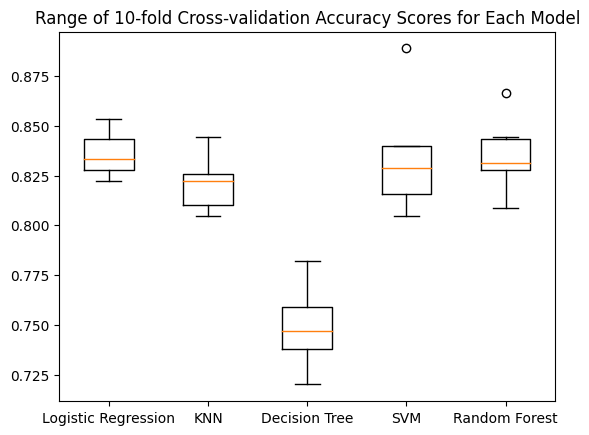

In [10]:
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), 
          "Decision Tree": DecisionTreeClassifier(), "SVM": svm.SVC(),
         "Random Forest": RandomForestClassifier()} 
results = [] 
for model in models.values(): 
    kf = KFold(n_splits = 10, random_state = 2023, shuffle=True) 
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf) 
    results.append(cv_results) 
plt.boxplot(results, labels=models.keys())
plt.title("Range of 10-fold Cross-validation Accuracy Scores for Each Model")
plt.show()

In [11]:
for name, model in models.items(): 
    model.fit(X_train_scaled, y_train) 
    test_score = model.score(X_test_scaled, y_test) 
    print("{} Test Set Accuracy: {}".format(name, test_score))

Logistic Regression Test Set Accuracy: 0.8493333333333334
KNN Test Set Accuracy: 0.8266666666666667
Decision Tree Test Set Accuracy: 0.7666666666666667
SVM Test Set Accuracy: 0.8426666666666667
Random Forest Test Set Accuracy: 0.844


Logistic Regression performs best for this problem if we are using accuracy as the metric.

In [16]:
model = LogisticRegression(random_state = 1)
model.fit(X_train_scaled, y_train)
a = model.predict(X_test_scaled)
predictions = model.predict_proba(X_test_scaled)
predictions

array([[0.80579303, 0.19420697],
       [0.89384544, 0.10615456],
       [0.72391738, 0.27608262],
       ...,
       [0.94692566, 0.05307434],
       [0.683251  , 0.316749  ],
       [0.76454119, 0.23545881]])

In [17]:
model.score(X_test_scaled, y_test)

0.8493333333333334

In [14]:
df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
df_prediction_target = pd.DataFrame(model.predict(X_test_scaled), columns = ['predicted_TARGET'])
df_test_dataset = pd.DataFrame(y_test,columns= ['Actual Outcome'])
dfx=pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)
dfx.head()

,Actual Outcome,prob_0,prob_1,predicted_TARGET
0,0,0.805793,0.194207,0
1,0,0.893845,0.106155,0
2,0,0.723917,0.276083,0
3,1,0.662381,0.337619,0
4,0,0.933566,0.066434,0


In [15]:
dfx.to_csv('/Users/huangrui/Downloads/q/model3.csv', sep=',', encoding='UTF-8')
